## Imports

In [753]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

## Preparations

In [754]:
_df = pd.read_csv("./datasets/breast-cancer-wisconsin.csv")
_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [755]:
y = _df.diagnosis
y = pd.Series([int(x == "B") for x in y])
x = _df.drop(["Unnamed: 32", "id", "diagnosis"], axis=1)
x.head(), y

(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [756]:
def plot_history_performance(history):
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], color='#FFCC00', animated=True, label="Training Acc")
    plt.plot(history.history['val_accuracy'], color='green', animated=True, label="Validation Acc")
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

## Rough ANN

In [757]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=.5, random_state=36)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=.25, random_state=43)
x.shape, X_train.shape, X_valid.shape, X_test.shape

((569, 30), (284, 30), (213, 30), (72, 30))

In [758]:
scaler = StandardScaler()
X_norm_train, X_norm_val, X_norm_test = scaler.fit_transform(X_train), scaler.transform(X_valid), scaler.transform(X_test)

In [759]:
# HYPER-PARAMS
EPOCH_LENGTH=10
BATCH_SIZE=14

LEARN_RATE=.001

DROPOUT_RATE=.2

In [760]:
model = keras.Sequential([
    keras.Input(shape=(30,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(2, activation="sigmoid")
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/10
21/21 [==============================] - 2s 22ms/step - loss: 1.1204 - accuracy: 0.3028 - val_loss: 0.8394 - val_accuracy: 0.4460
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.6056 - val_loss: 0.5072 - val_accuracy: 0.8028
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 0.4357 - accuracy: 0.8169 - val_loss: 0.3685 - val_accuracy: 0.8732
Epoch 4/10
21/21 [==============================] - 0s 9ms/step - loss: 0.3162 - accuracy: 0.9085 - val_loss: 0.2992 - val_accuracy: 0.9014
Epoch 5/10
21/21 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.9401 - val_loss: 0.2546 - val_accuracy: 0.9296
Epoch 6/10
21/21 [==============================] - 0s 9ms/step - loss: 0.2243 - accuracy: 0.9401 - val_loss: 0.2237 - val_accuracy: 0.9390
Epoch 7/10
21/21 [==============================] - 0s 9ms/step - loss: 0.1850 - accuracy: 0.9613 - val_loss: 0.2008 - val_accuracy: 0.9531
Epoch 8/10
21/21 [

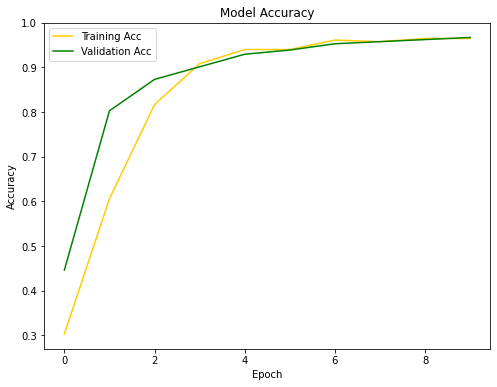

3/3 [==============================] - 0s 5ms/step - loss: 0.1736 - accuracy: 0.9444


[0.17361800372600555, 0.9444444179534912]

In [761]:
history = None
history = model.fit(
    X_norm_train, y_train,
    epochs=EPOCH_LENGTH,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val, y_valid)
)

plot_history_performance(history=history)

model.evaluate(X_norm_test, y_test)

## Correlated Features Dropped

In [762]:
cols_to_drop=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_2 = x.drop(cols_to_drop, axis=1)

X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(x_2, y, test_size=.5, random_state=36)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=.25, random_state=43)
x_2.shape, X_train_2.shape, X_valid_2.shape, X_test_2.shape

((569, 16), (284, 16), (213, 16), (72, 16))

In [763]:
scaler = StandardScaler()
X_norm_train_2, X_norm_val_2, X_norm_test_2 = scaler.fit_transform(X_train_2), scaler.transform(X_valid_2), scaler.transform(X_test_2)

In [764]:
model_2 = keras.Sequential([
    keras.Input(shape=(16,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE**2),
    keras.layers.Dense(2, activation="sigmoid")
])
model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/20
21/21 [==============================] - 2s 31ms/step - loss: 0.5677 - accuracy: 0.7465 - val_loss: 0.5210 - val_accuracy: 0.7887
Epoch 2/20
21/21 [==============================] - 0s 15ms/step - loss: 0.4360 - accuracy: 0.8521 - val_loss: 0.4250 - val_accuracy: 0.8592
Epoch 3/20
21/21 [==============================] - 0s 19ms/step - loss: 0.3612 - accuracy: 0.8803 - val_loss: 0.3692 - val_accuracy: 0.8826
Epoch 4/20
21/21 [==============================] - 1s 31ms/step - loss: 0.3200 - accuracy: 0.9120 - val_loss: 0.3301 - val_accuracy: 0.9014
Epoch 5/20
21/21 [==============================] - 0s 13ms/step - loss: 0.2793 - accuracy: 0.9225 - val_loss: 0.3009 - val_accuracy: 0.9296
Epoch 6/20
21/21 [==============================] - 0s 21ms/step - loss: 0.2548 - accuracy: 0.9296 - val_loss: 0.2749 - val_accuracy: 0.9249
Epoch 7/20
21/21 [==============================] - 0s 12ms/step - loss: 0.2257 - accuracy: 0.9472 - val_loss: 0.2549 - val_accuracy: 0.9484
Epoch 8/20
21

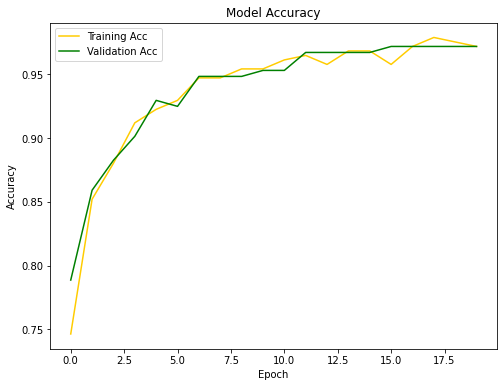

3/3 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9583


[0.13629674911499023, 0.9583333134651184]

In [765]:
history_2 = None
history_2 = model_2.fit(
    X_norm_train_2, y_train_2,
    epochs=EPOCH_LENGTH*2,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val_2, y_valid_2)
)

plot_history_performance(history=history_2)

model_2.evaluate(X_norm_test_2, y_test_2)

## Feature Ranking and Selection

In [786]:
select_feature = SelectKBest(chi2, k=5).fit(X_train_2, y_train_2)

__df = pd.DataFrame(dict(feature=X_train_2.columns, score=select_feature.scores_)).sort_values(by="score", ascending=False)
__df.head()

,feature,score
1,area_mean,27701.728377
7,area_se,4690.218203
0,texture_mean,43.068601
13,concavity_worst,19.948642
3,concavity_mean,9.554123


In [780]:
X_train_3 = select_feature.transform(X_train_2)
X_valid_3 = select_feature.transform(X_valid_2)
X_test_3 = select_feature.transform(X_test_2)

In [768]:
scaler = StandardScaler()
X_norm_train_3, X_norm_val_3, X_norm_test_3 = scaler.fit_transform(X_train_3), scaler.transform(X_valid_3), scaler.transform(X_test_3)

In [769]:
model_3 = keras.Sequential([
    keras.Input(shape=(5,)),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE**2),
    keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(4, activation="sigmoid"),
    keras.layers.Dense(2, activation="sigmoid")
])
model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/20
21/21 [==============================] - 5s 47ms/step - loss: 0.7163 - accuracy: 0.4085 - val_loss: 0.7053 - val_accuracy: 0.3850
Epoch 2/20
21/21 [==============================] - 0s 17ms/step - loss: 0.6747 - accuracy: 0.4718 - val_loss: 0.6653 - val_accuracy: 0.5211
Epoch 3/20
21/21 [==============================] - 0s 15ms/step - loss: 0.6418 - accuracy: 0.6655 - val_loss: 0.6281 - val_accuracy: 0.7887
Epoch 4/20
21/21 [==============================] - 0s 14ms/step - loss: 0.6064 - accuracy: 0.8662 - val_loss: 0.5894 - val_accuracy: 0.8732
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5703 - accuracy: 0.9049 - val_loss: 0.5511 - val_accuracy: 0.8826
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 0.5299 - accuracy: 0.9085 - val_loss: 0.5138 - val_accuracy: 0.8920
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4892 - accuracy: 0.9190 - val_loss: 0.4772 - val_accuracy: 0.8967
Epoch 8/20
21/

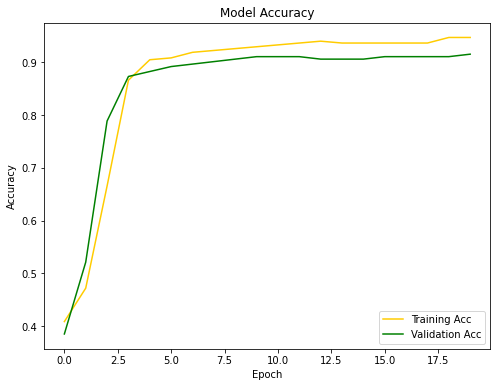

3/3 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.9444


[0.24987027049064636, 0.9444444179534912]

In [770]:
history_3 = None
history_3 = model_3.fit(
    X_norm_train_3, y_train_2,
    epochs=EPOCH_LENGTH*2,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val_3, y_valid_2)
)

plot_history_performance(history=history_3)

model_3.evaluate(X_norm_test_3, y_test_2)

In [784]:
model_3.save("trained_model", save_format="tf", overwrite=True, include_optimizer=True)

INFO:tensorflow:Assets written to: trained_model\assets


In [787]:
X_test_3[20]

array([1.766e+01, 6.748e+02, 4.069e-02, 1.975e+01, 2.060e-01])